In [1]:
import tensorflow as tf
from tensorflow import keras 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import random

In [4]:
get_ipython().run_line_magic('matplotlib','inline')

In [9]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)= mnist.load_data()

In [6]:
len(x_train)

60000

In [7]:
len(x_test)

10000

In [8]:
x_train.shape

(60000, 28, 28)

In [11]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

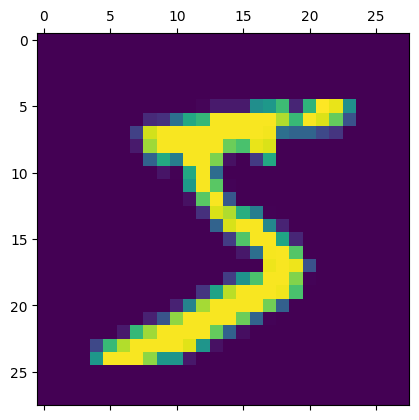

In [12]:
plt.matshow(x_train[0])

In [13]:
x_train=x_train/255
x_test=x_test/255

In [14]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
  keras.layers.Dense(128,activation='relu'),keras.layers.Dense(10,activation='softmax')                     
                       ])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
history=model.fit(x_train ,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 10.1011 - accuracy: 0.1702 - val_loss: 1.8453 - val_accuracy: 0.3069
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9303 - accuracy: 0.2986 - val_loss: 2.0158 - val_accuracy: 0.2326
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9704 - accuracy: 0.2459 - val_loss: 1.9739 - val_accuracy: 0.2341
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.9478 - accuracy: 0.2564 - val_loss: 1.8333 - val_accuracy: 0.3027
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.9955 - accuracy: 0.2427 - val_loss: 1.8960 - val_accuracy: 0.2556
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.0509 - accuracy: 0.2251 - val_loss: 2.0660 - val_accuracy: 0.2148
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.1064 - accuracy: 0.2156 - val_loss: 2.0914 - val_accuracy

In [14]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f"%test_loss)
print("accuracy=%.3f" %test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 2.2169 - accuracy: 0.1420
Loss=2.217
accuracy=0.142


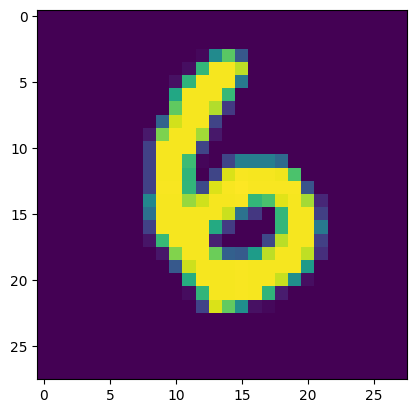

In [15]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [16]:
predicted_value=model.predict(x_test)
print("handwritten number in the imageis=%d"% np.argmax(predicted_value[n]))

313/313 [==============================] - 1s 2ms/step
handwritten number in the imageis=7


In [17]:
get_ipython().run_line_magic('pinfo2','history.history')


Type:        dict
String form: {'loss': [10.101149559020996, 1.9302903413772583, 1.9703994989395142, 1.9477936029434204, 1.9954864978790283, 2.0509331226348877, 2.106395721435547, 2.1283857822418213, 2.217890739440918, 2.1789894104003906], 'accuracy': [0.17018333077430725, 0.2985999882221222, 0.24594999849796295, 0.25644999742507935, 0.24273332953453064, 0.22505000233650208, 0.21558333933353424, 0.20555000007152557, 0.17588333785533905, 0.15721666812896729], 'val_loss': [1.845319151878357, 2.0157744884490967, 1.9739402532577515, 1.8333115577697754, 1.8959755897521973, 2.065974235534668, 2.0913631916046143, 2.1813859939575195, 2.123347520828247, 2.2169291973114014], 'val_accuracy': [0.3068999946117401, 0.23260000348091125, 0.23409999907016754, 0.302700012922287, 0.2556000053882599, 0.21480000019073486, 0.18870000541210175, 0.20980000495910645, 0.1753000020980835, 0.1420000046491623]}
Length:      4
Docstring:  
dict() -> new empty dictionary
dict(mapping) -> new dictionary initialized f

In [18]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

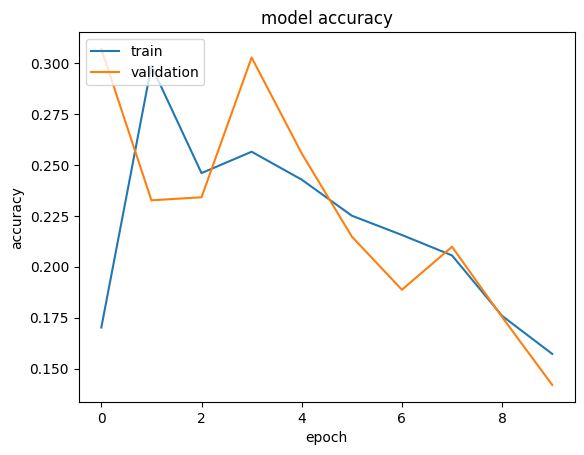

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

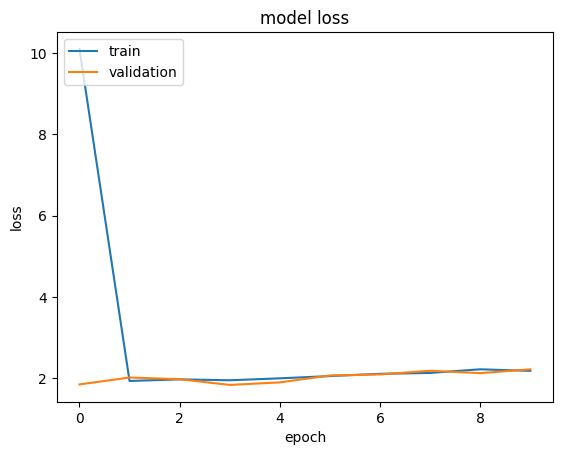

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

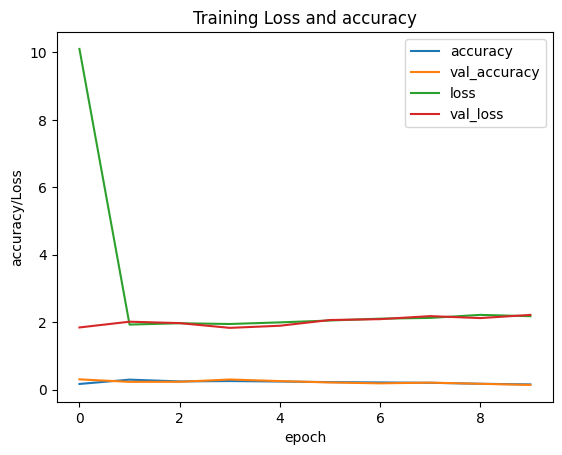

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy','val_accuracy','loss','val_loss'])
plt.show()

In [28]:
keras_model_path='C:\\Windows\\System32\\cmd.exe'
model.save(keras_model_path)

INFO:tensorflow:Assets written to: C:\Users\photovenom\Desktop\dsbda\deep learning\assets


INFO:tensorflow:Assets written to: C:\Users\photovenom\Desktop\dsbda\deep learning\assets
